In [2]:
import rafias_lib as rl
import everett_code as ec
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack, vstack, MaskedColumn
from photutils import CircularAperture, CircularAnnulus, aperture_photometry
from astropy.modeling import models, fitting
from mpl_toolkits.mplot3d import Axes3D as a3d
import numpy as np
import pdb, glob
import matplotlib.pyplot as plt
%matplotlib inline

## 05/25

In [4]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

In [5]:
image = rl.test_image(fnames[2])[0]
mask1 = rl.test_image(fnames[2])[3]

In [6]:
y, x = np.mgrid[:image.shape[0],:image.shape[1]]
mask2 = ((x - 166)**2 + (y - 160)**2) <= (70)**2
image[mask2].shape

(15373,)

In [7]:
mask3 = (x > 50) & (x < 300) 

In [19]:
final_mask = (mask1==False) & (mask2==False) & (mask3 == True)

In [20]:
image[final_mask].shape, x[final_mask].shape

((64281,), (64281,))

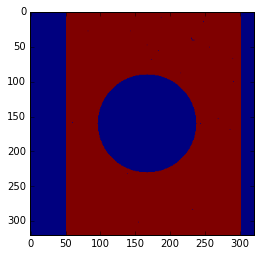

In [21]:
plt.imshow(final_mask, vmin= 0, vmax= 1)

In [22]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, fnames)

In [23]:
image, _, _, mask = rl.test_image(fnames[5])

In [25]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

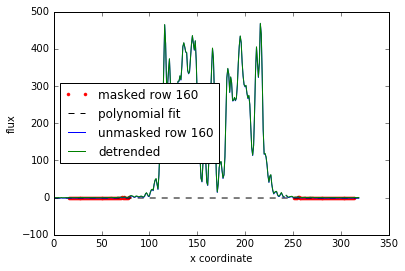

In [27]:
rl.row_row(image, mask, centers[1][5][0], centers[2][5][0], 85, 150, plots = True, row = 160)
# plt.ylim(-5, 5)

(-5, 5)

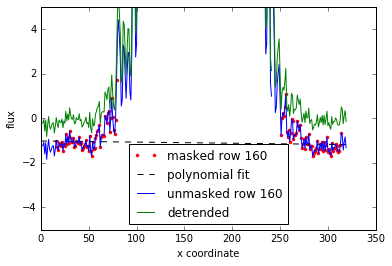

In [26]:
rl.row_row(image, mask, centers[1][5][0], centers[2][5][0], 85, 150, plots = True, row = 160)
plt.ylim(-5, 5)

(-5, 5)

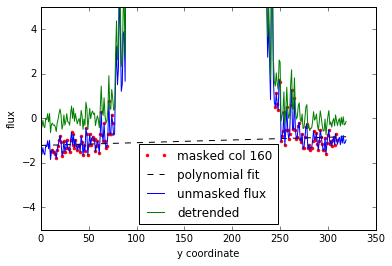

In [15]:
rl.col_col(image, mask, centers[1][5][0], centers[2][5][0], 85, 150, plots = True, col = 160)
plt.ylim(-5, 5)

## 04/14


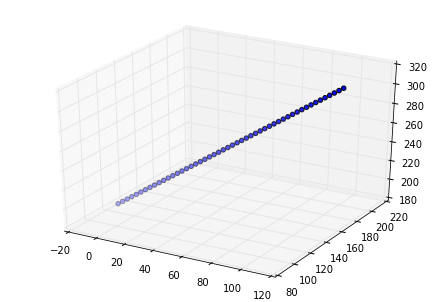

In [5]:
x = np.linspace(1,100)
y = np.linspace(101,200)
z = np.linspace(201,300)
ax = a3d(plt.gcf())
ax.scatter(x,y,z)

In [29]:
x, y = np.mgrid[:320, :320]
z = x*y
print x.shape, z.shape
ax.plot_surface(x,y,z)

(320, 320) (320, 320)


In [3]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

(320, 320) (320, 320) (320, 320)


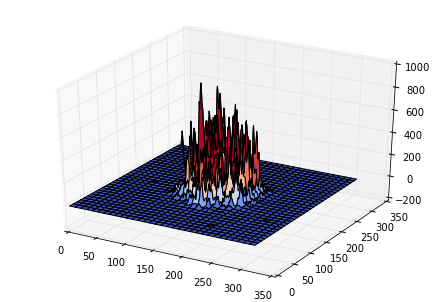

In [24]:
image = fits.getdata(fnames[2])
y, x = np.mgrid[:image.shape[1],:image.shape[2]]
z = image[0]
print x.shape, y.shape, z.shape
ax = a3d(plt.gcf())
ax.plot_surface(x,y,z, cmap = 'coolwarm', vmin = -5, vmax = 300)

## 03/22

In [2]:
clr_a1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB1*_481_SE_2016-*/*.slp.fits'))
len(clr_a1)

100

In [4]:
clr_b4 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB1*_489_SE_2016-*/*.slp.fits'))
len(clr_b4)

100

In [11]:
cen_a1 = rl.gen_center_g2d(164,161,5,3500,2,2,0,clr_a1)

In [12]:
cen_b4 = rl.gen_center_g2d(160,155,5,4500,2,2,0,clr_b4)

In [13]:
data_a1 = rl.time_series(cen_a1[1], cen_a1[2], clr_a1, 3, 9, 10)
data_b4 = rl.time_series(cen_b4[1], cen_b4[2], clr_b4, 3, 9, 10)
av = (np.array(data_a1['res_flux'])+np.array(data_b4['res_flux']))/2.
stdev = np.std(av)/np.median(av)
stdev

nan

## 02/15

In [2]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

In [3]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, fnames)

In [16]:
image, _, _,mask = rl.test_image(fnames[5])

In [20]:
np.where(mask == True)

(array([  9,  11,  14,  15,  28,  28,  38,  39,  40,  41,  41,  41,  41,
         48,  51,  56,  67,  69,  88, 100, 153, 156, 157, 157, 158, 158,
        159, 159, 160, 165, 169, 169, 232, 249, 283, 301, 306, 306]),
 array([186,  22, 246, 246,  82, 142, 229, 229, 230, 230, 231, 232, 233,
        166, 255, 182, 288, 172, 214, 289, 267, 228, 227, 229, 228, 229,
         60, 228, 242, 183,   3, 284, 138,   9, 231, 154,  18,  19]))

In [18]:
image[14][246]

nan

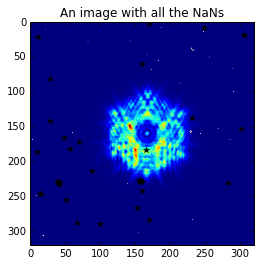

In [34]:
x, y = np.where(mask == True)
plt.plot(x, y, 'k*')
plt.imshow(image)
plt.title('An image with all the NaNs')

## 02/01

In [2]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

In [3]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, fnames)

In [9]:
image, _, _,mask = rl.test_image(fnames[5])

In [5]:
a = np.zeros_like(image)

In [25]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [7]:
help(rl.col_col)

Help on function col_col in module rafias_lib:

col_col(image, mask, cenX, cenY, r, box=150, plots=False, col=160)



In [16]:
columns = rl.col_col(image, mask, centers[1][5][0], centers[2][5][0], r = 50, box = 150, plots = True, col = 160)
plt.ylim(-5, 5)

/home/rafia/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/rafia/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


ValueError: need more than 1 value to unpack

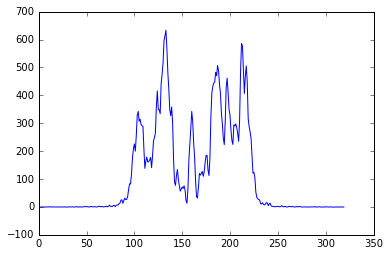

In [27]:
y = range(0, 320, 1)
flux_fit = columns[0][150] #The 0th image(in this case, the 6th) and 155th column(in this case 165th)
#0th image because I only gave it one image in the previous cell, the 6th one.
#155th column because of cenX-box which means it counts the 15th column as its 0th column. 
plt.plot(y, flux_fit)

In [33]:
b = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,7],[5,6,7,8]])
print b.shape
b

(5, 4)


array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])

In [37]:
b[:, 2] = [0,0,0,0,0]
b

array([[1, 2, 0, 4],
       [2, 3, 0, 5],
       [3, 4, 0, 6],
       [4, 5, 0, 7],
       [5, 6, 0, 8]])

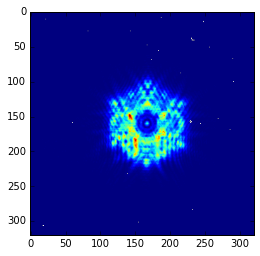

In [43]:
for i in range(15, 315, 1):
    a[:, i] = columns[0][i-15]
plt.imshow(a)

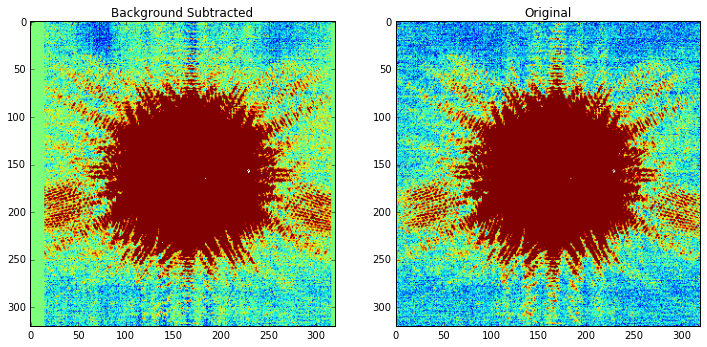

In [66]:
plt.figure(figsize=(12,14))
plt.subplot(1,2,1)
plt.imshow(a, vmin = -1, vmax= 1)
plt.title("Background Subtracted")
plt.subplot(1,2,2)
plt.imshow(image, vmin = -2, vmax= 0)
plt.title("Original")
# plt.colorbar()

In [57]:
np.save('bkg_subtracted(col_col)_im[5]', a)

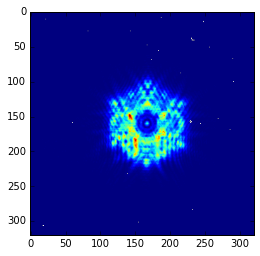

In [63]:
c = np.load('bkg_subtracted(col_col)_im[5].npy')
plt.imshow(c)

## 01/31

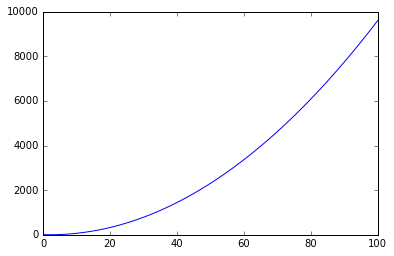

In [5]:
x = np.linspace(0, 100, 50)
y = x**2 - 4*x + 7
plt.plot(x, y)

In [6]:
params = ec.robust_poly(x, y, 2)
params

array([ 1., -4.,  7.])

In [7]:
a, b, c = ec.robust_poly(x, y, 2)
a, b, c

(1.0000000000000022, -4.0000000000000977, 7.0000000000023448)

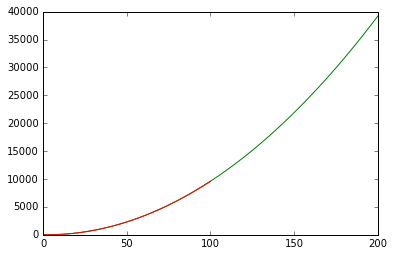

In [11]:
i = np.linspace(0, 200, 50)
j = a*(i**2) + b*i + c
plt.plot(i, j, 'g-')
plt.plot(x, y, 'r')
# plt.xlim(95,100)

In [15]:
a = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])
a.shape, a.shape[1]

((3, 4), 4)

In [17]:
a[:,2]

array([3, 4, 5])

In [2]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

In [3]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, fnames)

In [5]:
image, _, _, mask = rl.test_image(fnames[5])

In [14]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

(-5, 5)

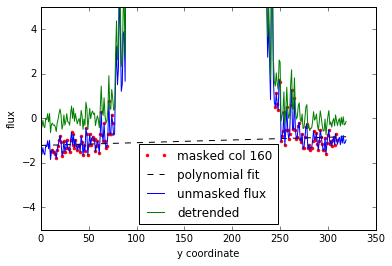

In [15]:
rl.col_col(image, mask, centers[1][5][0], centers[2][5][0], 85, 150, plots = True, col = 160)
plt.ylim(-5, 5)

## 01/30

In [32]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

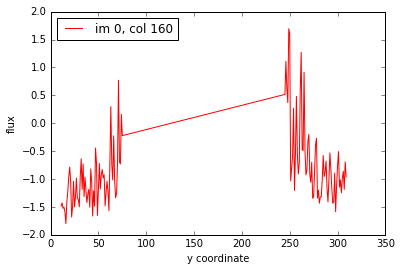

In [41]:
rl.col_col([fnames[5]], [centers[1][5]], [centers[2][5]], 85, 150, plots = True, im = 0, col = 160)

## 01/27

In [5]:
a = np.array([[1,2],[2,3],[3,4]])
mask = np.array([[True, True],[False, True],[True, False]])

In [12]:
b = [1,2,3,4]
msk = [True]

In [13]:
newA = MaskedColumn("name", b, msk)
newA

'name'

In [14]:
b

[1, 2, 3, 4]

In [38]:
np.ma.masked_less_equal(a, 2)

masked_array(data =
 [[-- --]
 [-- 3]
 [3 4]],
             mask =
 [[ True  True]
 [ True False]
 [False False]],
       fill_value = 999999)

In [17]:
mask

array([[ True,  True],
       [False,  True],
       [ True, False]], dtype=bool)

In [39]:
a

array([[1, 2],
       [2, 3],
       [3, 4]])

In [2]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

In [3]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, fnames)

In [4]:
image = rl.test_image(fnames[2])[0]
mask1 = rl.test_image(fnames[2])[3]

In [5]:
y, x = np.mgrid[:image.shape[0],:image.shape[1]]
mask2 = ((x - 166)**2 + (y - 160)**2) <= (70)**2
image[mask2].shape

(15373,)

In [6]:
mask3 = (y > 50) & (y < 300) 

In [7]:
final_mask = (mask1==False) & (mask2==False) & (mask3 == True) 

In [94]:
image[final_mask].shape, y[final_mask].shape

((181,), (181,))

In [95]:
y[final_mask]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
       282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 31

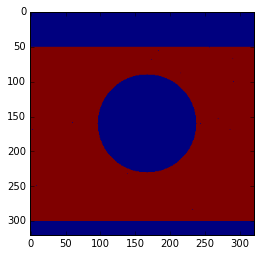

In [111]:
plt.imshow(final_mask, vmin= 0, vmax= 1)

In [130]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [ ]:
rl.col_col(fnames, centers[1], centers[2], 70, 150)

## 01/25

In [2]:
a = np.array([[1,2],[2,3],[3,4]])
mask = np.array([[True, True],[False, True],[True, False]])

In [3]:
a + mask

array([[2, 3],
       [2, 4],
       [4, 4]])

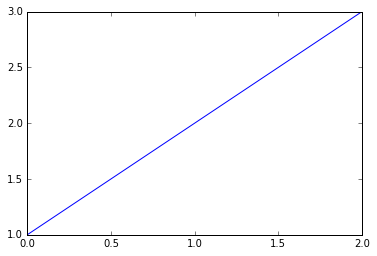

In [23]:
a = np.array([[1,2],[2,3],[3,4]])
mask = np.array([[False,False],[True,False],[False,False]])
y, x = np.mgrid[0:a.shape[0],0:a.shape[1]]
columnAll = x == 0
columnMasked = columnAll & (mask == False)
flux = a[columnMasked]
yCoordinate = y[columnMasked]
plt.plot(yCoordinate,flux)
plt.show()

In [26]:
x

array([[0, 1],
       [0, 1],
       [0, 1]])

In [27]:
y

array([[0, 0],
       [1, 1],
       [2, 2]])

In [30]:
(mask == False) & (x ==0)

array([[ True, False],
       [False, False],
       [ True, False]], dtype=bool)

In [31]:
a[columnMasked]

array([1, 3])

In [18]:
columnMasked

array([[ True, False],
       [False, False],
       [ True, False]], dtype=bool)

In [42]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

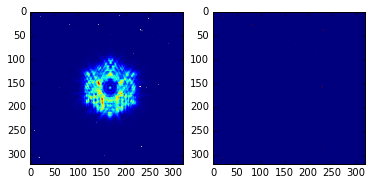

In [43]:
image = rl.test_image(fnames[2])[0]
mask1 = rl.test_image(fnames[2])[3]
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(mask1)

In [44]:
new_im = image & mask1 

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [29]:
cenx, ceny = 166,160
def dist(xcen, ycen, x, y):
    d = np.sqrt(np.square(xcen - x)+np.square(ycen - y))
    return d
mask2 = dist(cenx, ceny, image[0], image[1]) <= 70

TypeError: Invalid dimensions for image data

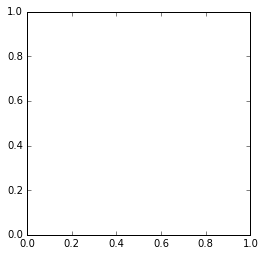

In [32]:
plt.imshow(mask2)

## 01/24

In [6]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

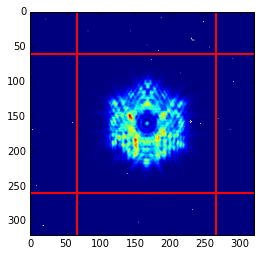

In [10]:
cenx,ceny = 166,160
box = 100
image = rl.test_image(fnames[2])[0]
plt.imshow(image)
plt.axvline(x= (cenx - box), linewidth=2, color='r')
plt.axvline(x= (cenx + box), linewidth=2, color='r')
plt.axhline(y= (ceny - box), linewidth=2, color='r')
plt.axhline(y= (ceny + box), linewidth=2, color='r')

## 12/07

In [5]:
es_data_sm = ascii.read('es_phot_data_tser_40_50_70.csv')
es_data_big = ascii.read('es_phot_data_tser_70_80_90.csv')
es_flux_sm = es_data_sm['AP00_FLUX_00']
es_flux_big = es_data_big['AP00_FLUX_00']
es_flux_sm, es_flux_big

(<Column name='AP00_FLUX_00' dtype='float64' length=306>
 1643800.0
 1644660.0
 1646650.0
 1644520.0
 1643370.0
 1643240.0
 1641610.0
 1641480.0
 1642830.0
 1646640.0
 1643850.0
 1643240.0
       ...
 1647500.0
 1646740.0
 1644570.0
 1647620.0
 1649120.0
 1646710.0
 1647520.0
 1647570.0
 1645930.0
 1644640.0
 1644850.0
 1646670.0, <Column name='AP00_FLUX_00' dtype='float64' length=306>
 3291830.0
 3294030.0
 3297630.0
 3294750.0
 3293640.0
 3293250.0
 3292760.0
 3290340.0
 3292260.0
 3297060.0
 3293940.0
 3296190.0
       ...
 3296600.0
 3292620.0
 3293910.0
 3298680.0
 3301220.0
 3294640.0
 3296950.0
 3295410.0
 3292150.0
 3293240.0
 3296750.0
 3297330.0)

In [30]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

In [31]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, fnames)

In [32]:
my_data_sm = rl.time_series(centers[1], centers[2], fnames, 40, 50, 70)
my_data_big = rl.time_series(centers[1], centers[2], fnames, 70, 80, 90)

In [33]:
small = Table()
small['Everett(40-50-70)'] = es_flux_sm
small['Rafia(40-50-70, raw)'] = my_data_sm['raw_flux']
small['Rafia(40-50-70, res)'] = my_data_sm['res_flux']
print "Everett's norm_stdev:", np.std(es_flux_sm)/np.median(es_flux_sm)
print "Rafia's norm_stdev(raw):", np.std(my_data_sm['raw_flux'])/np.median(my_data_sm['raw_flux'])
print "Rafia's norm_stdev(res):", np.std(my_data_sm['res_flux'])/np.median(my_data_sm['res_flux'])
small

Everett's norm_stdev: 0.00200496594954
Rafia's norm_stdev(raw): 0.00329625240791
Rafia's norm_stdev(res): 0.00155933502547


Everett(40-50-70),"Rafia(40-50-70, raw)","Rafia(40-50-70, res)"
float64,float64,float64
1643800.0,1647747.71542,1121979.89519
1644660.0,1649440.40423,1122400.67485
1646650.0,1658272.13654,1123821.53372
1644520.0,1650019.64457,1123287.84759
1643370.0,1649295.361,1122632.10086
1643240.0,1649141.53804,1122677.31905
1641610.0,1654025.13385,1122294.1764
1641480.0,1650309.3904,1121361.70602
1642830.0,1651103.1346,1122118.41534


In [34]:
big = Table()
big['Everett(70-80-90)'] = es_flux_big
big['Rafia(70-80-90, raw)'] = my_data_big['raw_flux']
big['Rafia(70-80-90, res)'] = my_data_big['res_flux']
print "Everett's norm_stdev:", np.std(es_flux_big)/np.median(es_flux_big)
print "Rafia's norm_stdev(raw):", np.std(my_data_big['raw_flux'])/np.median(my_data_big['raw_flux'])
print "Rafia's norm_stdev(res):", np.std(my_data_big['res_flux'])/np.median(my_data_big['res_flux'])
big

Everett's norm_stdev: 0.00160683649509
Rafia's norm_stdev(raw): 0.00472024843845
Rafia's norm_stdev(res): 0.0015918984059


Everett(70-80-90),"Rafia(70-80-90, raw)","Rafia(70-80-90, res)"
float64,float64,float64
3291830.0,3285047.08462,3266282.89023
3294030.0,3289566.11335,3269256.58882
3297630.0,3314176.50765,3272164.41887
3294750.0,3289917.29943,3270081.77244
3293640.0,3288515.16357,3268633.1772
3293250.0,3287991.73399,3268427.73894
3292760.0,3303737.51825,3268065.90317
3290340.0,3293751.13998,3265489.60991
3292260.0,3294934.21685,3267641.27896


In [35]:
dev_sm = small['Everett(40-50-70)'] - small['Rafia(40-50-70, res)']
av_dev_sm = np.average(dev_sm)
sample_sm = np.average((small['Everett(40-50-70)'] + small['Rafia(40-50-70, res)'])/2)
per_dev_sm = av_dev_sm/sample_sm

dev_big = big['Everett(70-80-90)'] - big['Rafia(70-80-90, res)']
av_dev_big = np.average(dev_big)
sample_big = np.average((big['Everett(70-80-90)'] + big['Rafia(70-80-90, res)'])/2)
per_dev_big = av_dev_big/sample_big
print "Average deviation from Everett's(40-50-70): ", av_dev_sm, per_dev_sm
print "Average deviation from Everett's(70-80-90): ", av_dev_big, per_dev_big

Average deviation from Everett's(40-50-70):  521244.637496 0.376486509203
Average deviation from Everett's(70-80-90):  24860.1989818 0.00756892538398


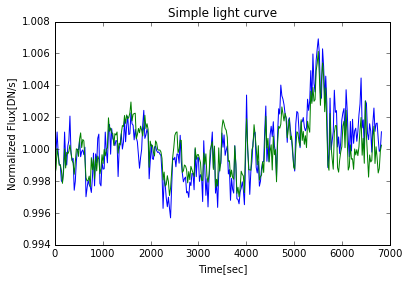

In [43]:
rl.light_curve(my_data_sm['time'], small['Everett(40-50-70)'], style = 'b')
rl.light_curve(my_data_sm['time'], small['Rafia(40-50-70, res)'], style = 'g')

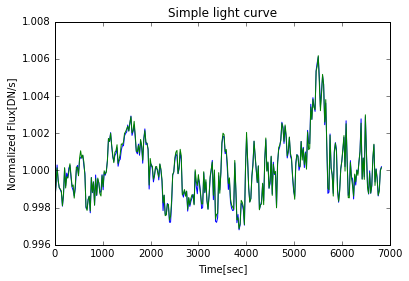

In [44]:
rl.light_curve(my_data_sm['time'], big['Everett(70-80-90)'], style = 'b')
rl.light_curve(my_data_sm['time'], big['Rafia(70-80-90, res)'], style = 'g')

## 11/28

In [7]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [8]:
rl.radius_testing(centers[2], centers[2], fnames, 80, 90, 5, 90, 100, 5, 100, 110, 5)

The minimum Standard deviation is 0.001589
It occurs for the radius r = 80.000000
It occurs for the inner radius r_in = 95.000000
It occurs for the outer radius r_out = 100.000000


norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64
0.00159158432359,80.0,90.0,100.0,10.0,10.0
0.00159274315281,80.0,90.0,105.0,10.0,15.0
0.00158935010578,80.0,95.0,100.0,15.0,5.0
0.00159224748897,80.0,95.0,105.0,15.0,10.0
0.00159471791888,85.0,90.0,100.0,5.0,10.0
0.00159611768729,85.0,90.0,105.0,5.0,15.0
0.00159211816199,85.0,95.0,100.0,10.0,5.0
0.00159558590376,85.0,95.0,105.0,10.0,10.0


## 11/17

In [7]:
a = ['a', 'b', 'c','d']
b = [1, 2, 3, 4]
c = [5, 6, 7, 8]
t = Table([a, b, c], names = ('a', 'b', 'c'), dtype=('S1', 'f8', 'i4'))
t

a,b,c
str1,float64,int32
a,1.0,5
b,2.0,6
c,3.0,7
d,4.0,8


## 8/22

In [24]:
class image2d(object):
    def __init__(self, hdu_filenames):
        self.hdu_filenames = hdu_filenames
        
    def gen_slp(self, red = False, red2 = False):
        image_2d = []
        if red == False: #Extracting from .slp files
            for hdus in self.hdu_filenames:
                hdu = fits.open(hdus)
                image = hdu[0].data
                image_2d.append(image[0])
        else:  #Extracting from .red files
            if red2 == False:
                #creating slope1 images
                for hdus in self.hdu_filenames:
                    hdu = fits.open(hdus)
                    image = hdu[0].data
                    header = hdu[0].header
                    slp_image = (image[-1] - image[0])/((header['NGROUP']-1)*header['TGROUP'])
                    image_2d.append(slp_image)
            else:
                #creating slope2 images
                for hdus in self.hdu_filenames:
                    hdu = fits.open(hdus)
                    image = hdu[0].data
                    header = hdu[0].header
                    slp_image = image[-1]/(header['NGROUP']*header['TGROUP'])
                    image_2d.append(slp_image)
        return image_2d

In [26]:
a1 = image2d(hdu_filenames_a1)
a1.gen_slp()

[array([[-1.41027832, -1.06201172, -1.29199219, ..., -1.59594727,
         -1.96191406, -1.51855469],
        [-1.74145508, -1.17919922, -1.04345703, ..., -1.40307617,
         -1.17224121, -1.36328125],
        [-1.64672852, -1.50708008, -1.46691895, ..., -1.64526367,
         -1.51281738, -1.2043457 ],
        ..., 
        [-1.95178223, -1.4387207 , -1.34094238, ..., -0.87255859,
         -1.38916016, -1.25512695],
        [-1.45532227, -1.48193359, -0.86022949, ..., -1.4440918 ,
         -1.5144043 , -1.34790039],
        [-1.21557617, -1.39526367, -1.36657715, ..., -1.16723633,
         -1.22094727, -1.54248047]], dtype=float32),
 array([[-1.34802246, -0.97509766, -1.19470215, ..., -1.54272461,
         -1.23083496, -1.71337891],
        [-1.5369873 , -1.03051758, -0.55371094, ..., -1.44970703,
         -1.23693848, -1.04077148],
        [-1.27612305, -1.32104492, -1.24755859, ..., -1.47387695,
         -1.09289551, -1.05786133],
        ..., 
        [-1.27502441, -1.52612305, -1

In [28]:
a1.gen_slp(red = True)

[array([[ 0.11921093,  0.10219824,  0.11522308, ...,  0.13009626,
          0.15076028,  0.12288201],
        [ 0.13323219,  0.10919562,  0.10278201, ...,  0.12093736,
          0.1086677 ,  0.11840237],
        [ 0.13283414,  0.12335593,  0.12475357, ...,  0.13423245,
          0.1258136 ,  0.1055455 ],
        ..., 
        [ 0.14547148,  0.12017887,  0.11559299, ...,  0.09168472,
          0.11931714,  0.10951845],
        [ 0.11731557,  0.12300371,  0.09075259, ...,  0.12045865,
          0.12407924,  0.11625341],
        [ 0.11040711,  0.11500633,  0.1186969 , ...,  0.10413569,
          0.1056022 ,  0.12685278]], dtype=float32),
 array([[ 0.11332239,  0.08904535,  0.10419549, ...,  0.12406356,
          0.10214785,  0.12765767],
        [ 0.12032152,  0.09640548,  0.07205713, ...,  0.11620642,
          0.1040872 ,  0.09282357],
        [ 0.11022503,  0.10435013,  0.10195468, ...,  0.1143039 ,
          0.09769765,  0.09331603],
        ..., 
        [ 0.10289306,  0.11472949,  0

In [27]:
a1.gen_slp(red = True, red2 = True)

[array([[ 0.04708486,  0.04726231,  0.048846  , ...,  0.04871496,
          0.05117585,  0.04549243],
        [ 0.04486736,  0.04841178,  0.04868742, ...,  0.04906289,
          0.0482367 ,  0.04852168],
        [ 0.04893346,  0.04648099,  0.04969299, ...,  0.05033059,
          0.0485466 ,  0.04376437],
        ..., 
        [ 0.04662685,  0.04666999,  0.04690083, ...,  0.04616297,
          0.04817656,  0.04515619],
        [ 0.04317096,  0.04732618,  0.04585589, ...,  0.04668378,
          0.04682453,  0.04720178],
        [ 0.04785601,  0.04379493,  0.04864685, ...,  0.04416611,
          0.04303935,  0.04814214]], dtype=float32),
 array([[ 0.04441159,  0.03884478,  0.0429343 , ...,  0.04548093,
          0.03929382,  0.0408888 ],
        [ 0.04219517,  0.04323678,  0.04247602, ...,  0.04238072,
          0.04084985,  0.03935289],
        [ 0.04484238,  0.03715364,  0.03832569, ...,  0.03943935,
          0.0415378 ,  0.03901893],
        ..., 
        [ 0.03792854,  0.03739246,  0

In [ ]:
class centers(image2d):
    def __init__(self, hdu_filenames):
        self.hdu_filenames = hdu_filenames
    
    def gen_centers()

## 8/24

In [80]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [107]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.pyc'>

In [71]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, hdu_filenames_a1)[0]
centers

[(Parameter('x_mean', value=165.957862014),
  Parameter('y_mean', value=160.086898746)),
 (Parameter('x_mean', value=165.95454923),
  Parameter('y_mean', value=160.087290893)),
 (Parameter('x_mean', value=165.971602003),
  Parameter('y_mean', value=160.089622193)),
 (Parameter('x_mean', value=165.959523516),
  Parameter('y_mean', value=160.108219701)),
 (Parameter('x_mean', value=166.011418093),
  Parameter('y_mean', value=160.121689352)),
 (Parameter('x_mean', value=165.971081516),
  Parameter('y_mean', value=160.125357794)),
 (Parameter('x_mean', value=165.938381185),
  Parameter('y_mean', value=160.132461756)),
 (Parameter('x_mean', value=165.915041144),
  Parameter('y_mean', value=160.120045428)),
 (Parameter('x_mean', value=165.981993937),
  Parameter('y_mean', value=160.124199847)),
 (Parameter('x_mean', value=165.969651467),
  Parameter('y_mean', value=160.107808149)),
 (Parameter('x_mean', value=165.982537641),
  Parameter('y_mean', value=160.108742028)),
 (Parameter('x_mean', 

In [72]:
data = rl.time_series(centers, 80, hdu_filenames_a1)
data

Flux,Time
float64,float64
3316973.81327,0.0
3322041.36809,22.38012
3353265.11638,44.76024
3322215.80189,67.14036
3320907.62903,89.52048
3320245.98531,111.9006
3340858.07641,134.28072
3328634.58801,156.66084
3329627.74327,179.04096


In [73]:
error = rl.norm_flux_error(data['Flux'], 2.2, hdu_filenames_a1)
error

[8.0182774969929266e-05,
 8.0121594864301197e-05,
 7.9747698482905311e-05,
 8.0119491434246483e-05,
 8.013527022666791e-05,
 8.0143254327393409e-05,
 7.9895641906586607e-05,
 8.0042204782689196e-05,
 8.003026647133487e-05,
 7.9627729677798925e-05,
 7.9730322504438029e-05,
 7.964917457919444e-05,
 7.9418939835717163e-05,
 7.9808029224935506e-05,
 7.9925533012255024e-05,
 7.9359033382823616e-05,
 7.9845986183142546e-05,
 7.9491591324426302e-05,
 7.9739330964348352e-05,
 7.9978574358952176e-05,
 7.9377590394773674e-05,
 7.9415867109210766e-05,
 7.9885424435370474e-05,
 7.9367420214831926e-05,
 7.9443955470503611e-05,
 7.9999689706072695e-05,
 7.9510513578618926e-05,
 7.954913347851743e-05,
 7.9794808905542553e-05,
 7.9588681515100915e-05,
 8.0172563044576814e-05,
 7.9916907730551097e-05,
 7.9773871979296857e-05,
 7.9713210177460357e-05,
 7.9723161136989882e-05,
 7.9912389686805627e-05,
 7.9849886707258048e-05,
 7.9485646153908891e-05,
 7.9813081106723635e-05,
 7.9819359446641454e-05,
 7.9

## 8/29

In [108]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [83]:
hdu_filenames_b4 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-*_489_SE_*/*.slp.fits')
len(hdu_filenames_b4)

307

In [88]:
centers_b4 = rl.gen_center_g2d(162, 156, 5, 500, 2, 2, 0, hdu_filenames_b4)[0]
centers_b4

[(Parameter('x_mean', value=159.154083778),
  Parameter('y_mean', value=156.593990113)),
 (Parameter('x_mean', value=159.149132141),
  Parameter('y_mean', value=156.583788553)),
 (Parameter('x_mean', value=159.173824065),
  Parameter('y_mean', value=156.590719663)),
 (Parameter('x_mean', value=159.15173308),
  Parameter('y_mean', value=156.605461423)),
 (Parameter('x_mean', value=159.202971001),
  Parameter('y_mean', value=156.626039547)),
 (Parameter('x_mean', value=159.165093993),
  Parameter('y_mean', value=156.620309476)),
 (Parameter('x_mean', value=159.132477782),
  Parameter('y_mean', value=156.623550823)),
 (Parameter('x_mean', value=159.109227828),
  Parameter('y_mean', value=156.628989799)),
 (Parameter('x_mean', value=159.17167704),
  Parameter('y_mean', value=156.617309121)),
 (Parameter('x_mean', value=159.167540166),
  Parameter('y_mean', value=156.611481065)),
 (Parameter('x_mean', value=159.17838075),
  Parameter('y_mean', value=156.607335825)),
 (Parameter('x_mean', va

In [87]:
rl.radius_testing(centers_a1, 50, 100, 5, 70, 120, 5, 90, 140, 5, hdu_filenames_a1)

The minimum Standard deviation is 0.001580
It occurs for the radius r = 50.000000
It occurs for the inner radius r_in = 70.000000
It occurs for the outer radius r_out = 90.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
2470384.32249,3904.01261708,0.0015803260171,50.0,70.0,90.0,20.0,20.0
2477483.50347,3917.12237406,0.00158108918529,50.0,70.0,95.0,20.0,25.0
2482648.42437,3926.8577774,0.00158172125334,50.0,70.0,100.0,20.0,30.0
2486578.62037,3933.93949474,0.00158206921853,50.0,70.0,105.0,20.0,35.0
2489661.7854,3940.06082188,0.0015825687027,50.0,70.0,110.0,20.0,40.0
2492122.2443,3944.93152371,0.00158296068049,50.0,70.0,115.0,20.0,45.0
2494135.58639,3949.36775644,0.00158346153192,50.0,70.0,120.0,20.0,50.0
2495796.46069,3953.4736331,0.0015840529047,50.0,70.0,125.0,20.0,55.0
2497142.30934,3956.96229871,0.00158459623383,50.0,70.0,130.0,20.0,60.0


In [89]:
data  = rl.average_residual_flux(centers_a1, centers_b4, 90, 100, 110, hdu_filenames_a1, hdu_filenames_b4)
data

a1_b4_raw_flux,a1_b4_bkg_flux,a1_res_flux,b4_res_flux,a1_b4_res_flux,Time
float64,float64,float64,float64,float64,float64
3825413.8214,1198.798211,3343925.33375,4297654.43714,3820789.88545,0.0
3839757.08532,4475.13128127,3347309.9907,4297681.73863,3822495.86467,22.38012
3835665.95377,3442.1428643,3349852.74798,4294925.48604,3822389.11701,44.76024
3821136.59797,-617.687665898,3347287.93676,4299750.27833,3823519.10754,67.14036
3822924.68588,-851.635276928,3346248.63432,4306170.49529,3826209.5648,89.52048
3822352.28587,-359.804980942,3346408.68106,4301071.52909,3823740.10508,111.9006
3825374.5349,1064.50154728,3345602.87043,4296934.33029,3821268.60036,134.28072
3829896.21331,1862.40254675,3343263.53764,4302161.78362,3822712.66063,156.66084
3815741.6109,-1341.60860818,3345636.17979,4296196.59412,3820916.38696,179.04096


In [95]:
rl.time_series(166, 160, 70, hdu_filenames_a1)

Flux,Time
float64,float64
3285019.65206,0.0
3289542.2391,22.38012
3314142.741,44.76024
3289878.45079,67.14036
3288451.00991,89.52048
3287938.68048,111.9006
3303690.41655,134.28072
3293723.15755,156.66084
3294878.17682,179.04096


In [96]:
rl.time_series(166, 160, 70, hdu_filenames_a1, red = True)

Flux,Time
float64,float64
-161409.419865,0.0
-161761.350843,22.38012
-162931.841907,44.76024
-161788.521197,67.14036
-161654.394918,89.52048
-161519.402709,111.9006
-162259.401899,134.28072
-161889.722207,156.66084
-161997.033186,179.04096


In [97]:
rl.time_series(166, 160, 70, hdu_filenames_a1, red = True, red2 = True)

Flux,Time
float64,float64
783.129771281,0.0
660.979912468,22.38012
703.186238177,44.76024
650.942100808,67.14036
711.391299828,89.52048
815.597098734,111.9006
851.616407973,134.28072
735.181781873,156.66084
687.425971597,179.04096


In [98]:
a = [[1,2,3],[2,3,4],[3,4,5]]
a[0]

[1, 2, 3]

## 8/31

###### Old readius testing code

In [114]:
def radius_testing(centers, r_src_low, r_src_up, r_src_inc, r_in_low, r_in_up, r_in_inc, r_out_low, r_out_up, 
                   r_out_inc, hdu_filenames, red_files = False, rf_slope = False):

    r_source = np.arange(r_src_low,r_src_up,r_src_inc)
    r_inner = np.arange(r_in_low,r_in_up,r_in_inc)
    r_outer = np.arange(r_out_low,r_out_up,r_out_inc)
    flux_and_parameters = Table(names=('residual_aperture_sum', 'r_source', 'r_in','r_out'))
    if red_files == False:
        for index, hdus in enumerate(hdu_filenames):
            hdu = fits.open(hdus)
            image = hdu[0].data
            image2d = image[0,:,:]
            mask = np.isnan(image2d) == True
            for r in r_source:
                for r_in in r_inner:
                    for r_out in r_outer:
                        if (r<r_in) and (r<r_out) and (r_in<r_out):
                            aperture = CircularAperture(centers[index], r)
                            annular_apperture =CircularAnnulus(centers[index], r_in, r_out)
                            rawflux_table = aperture_photometry(image2d, aperture, mask = mask)
                            bkgflux_table = aperture_photometry(image2d, annular_apperture, mask = mask)
                            phot_table = hstack([rawflux_table, bkgflux_table], table_names = ['raw','bkg'])
                            bkg_mean = phot_table['aperture_sum_bkg']/annular_apperture.area()
                            bkg_sum = bkg_mean*aperture.area()
                            final_sum = phot_table['aperture_sum_raw'] - bkg_sum
                            phot_table['residual_aperture_sum'] = final_sum
                            flux_and_parameters.add_row([final_sum,r,r_in,r_out])
                            
    # The else block is the code for red files
    else:
        if rf_slope == False:
            #creating slope images
            image2d = []
            for hdus in hdu_filenames:
                hdu = fits.open(hdus)
                image = hdu[0].data
                header = hdu[0].header
                slp_image = (image[-1] - image[0])/((header['NGROUP']-1)*header['TGROUP'])
                image2d.append(slp_image)
        else:
            #creating slope images
            image2d = []
            for hdus in hdu_filenames:
                hdu = fits.open(hdus)
                image = hdu[0].data
                header = hdu[0].header
                slp_image = image[-1]/(header['NGROUP']*header['TGROUP'])
                image2d.append(slp_image)
        #Doing the actual radius test
        for index, image in enumerate(image2d):
            mask = np.isnan(image) == True
            for r in r_source:
                for r_in in r_inner:
                    for r_out in r_outer:
                        if (r<r_in) and (r<r_out) and (r_in<r_out):
                            aperture = CircularAperture(centers[index], r)
                            annular_apperture =CircularAnnulus(centers[index], r_in, r_out)
                            rawflux_table = aperture_photometry(image, aperture, mask = mask)
                            bkgflux_table = aperture_photometry(image, annular_apperture, mask = mask)
                            phot_table = hstack([rawflux_table, bkgflux_table], table_names = ['raw','bkg'])
                            bkg_mean = phot_table['aperture_sum_bkg']/annular_apperture.area()
                            bkg_sum = bkg_mean*aperture.area()
                            final_sum = phot_table['aperture_sum_raw'] - bkg_sum
                            phot_table['residual_aperture_sum'] = final_sum
                            flux_and_parameters.add_row([final_sum,r,r_in,r_out])
    
    #Generating median flux and standard deviation at each r_source
    s1 = Table(names=('Median_Res_Flux','St_Dev', 'norm_stdev', 'r_source','r_in','r_out', 'rIn - r', 'rOut - rIn'))
    for r in r_source:
        for r_in in r_inner:
            for r_out in r_outer:
                if (r<r_in) and (r<r_out) and (r_in<r_out):
                    indices = ((flux_and_parameters['r_source'] == r) & (flux_and_parameters['r_in'] == r_in) & (flux_and_parameters['r_out'] == r_out)) 
                    st_dev = np.std(flux_and_parameters["residual_aperture_sum"][indices])
                    median_flux = np.median(flux_and_parameters["residual_aperture_sum"][indices])
                    norm_stdev = st_dev/median_flux
                    s1.add_row([median_flux,st_dev,norm_stdev,r,r_in,r_out,r_in-r,r_out-r_in])
    
    #Finding the best combination
    r1 = s1['r_source']
    r_in1 = s1['r_in']
    r_out1 = s1['r_out']
    min_std_dev = np.amin(s1['norm_stdev'])
    best_r = r1[np.argmin(s1['norm_stdev'])]
    best_r_in = r_in1[np.argmin(s1['norm_stdev'])]
    best_r_out = r_out1[np.argmin(s1['norm_stdev'])]
    print "The minimum Standard deviation is %f" % min_std_dev
    print "It occurs for the radius r = %f" % best_r
    print "It occurs for the inner radius r_in = %f" % best_r_in
    print "It occurs for the outer radius r_out = %f" % best_r_out
    return s1

In [111]:
rl.radius_testing(centers_a1, 50, 100, 10, 70, 120, 10, 90, 140, 10, hdu_filenames_a1)

The minimum Standard deviation is 0.001580
It occurs for the radius r = 50.000000
It occurs for the inner radius r_in = 70.000000
It occurs for the outer radius r_out = 90.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
2470384.32249,3904.01261708,0.0015803260171,50.0,70.0,90.0,20.0,20.0
2482648.42437,3926.8577774,0.00158172125334,50.0,70.0,100.0,20.0,30.0
2489661.7854,3940.06082188,0.0015825687027,50.0,70.0,110.0,20.0,40.0
2494135.58639,3949.36775644,0.00158346153192,50.0,70.0,120.0,20.0,50.0
2497142.30934,3956.96229871,0.00158459623383,50.0,70.0,130.0,20.0,60.0
2490900.53356,3940.41792163,0.00158192503817,50.0,80.0,90.0,30.0,10.0
2497427.55459,3953.89236161,0.00158318600848,50.0,80.0,100.0,30.0,20.0
2500860.17714,3960.84760654,0.00158379410522,50.0,80.0,110.0,30.0,30.0
2502939.07881,3966.11704122,0.00158458392967,50.0,80.0,120.0,30.0,40.0


In [115]:
radius_testing(centers_a1, 50, 100, 10, 70, 120, 10, 90, 140, 10, hdu_filenames_a1)

The minimum Standard deviation is 0.001580
It occurs for the radius r = 50.000000
It occurs for the inner radius r_in = 70.000000
It occurs for the outer radius r_out = 90.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
2470384.32249,3904.01261708,0.0015803260171,50.0,70.0,90.0,20.0,20.0
2482648.42437,3926.8577774,0.00158172125334,50.0,70.0,100.0,20.0,30.0
2489661.7854,3940.06082188,0.0015825687027,50.0,70.0,110.0,20.0,40.0
2494135.58639,3949.36775644,0.00158346153192,50.0,70.0,120.0,20.0,50.0
2497142.30934,3956.96229871,0.00158459623383,50.0,70.0,130.0,20.0,60.0
2490900.53356,3940.41792163,0.00158192503817,50.0,80.0,90.0,30.0,10.0
2497427.55459,3953.89236161,0.00158318600848,50.0,80.0,100.0,30.0,20.0
2500860.17714,3960.84760654,0.00158379410522,50.0,80.0,110.0,30.0,30.0
2502939.07881,3966.11704122,0.00158458392967,50.0,80.0,120.0,30.0,40.0


## 9/9

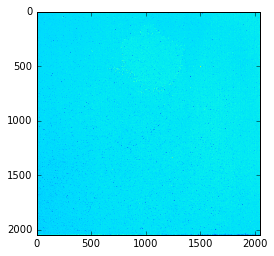

In [3]:
flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits'
flat_file = fits.open(flat_name)
flat_data = flat_file[1].data
# flat = flat_data[0]
# flat_data.shape
plt.imshow(flat_data)

## 10/3

In [2]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [27]:
centers_a1 = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, hdu_filenames_a1)

In [21]:
hdu_filenames_b4 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-*_489_SE_*/*.slp.fits')

In [43]:
centers_b4 = rl.gen_center_g2d(162, 156, 5, 500, 2, 2, 0, hdu_filenames_b4)

In [23]:
filenames_red = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8FULL1-*_481_SE_*/*.red.fits')

In [25]:
centers_red = rl.gen_center_g2d(1405,1036,5,400,4,4,0,filenames_red, red = True, 
                                flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat\
                                _F150W_CLEAR_2016-04-05.fits')[0]

In [67]:
data = rl.time_series(centers_a1[1], centers_a1[2], hdu_filenames_a1, radius = 80)
data

Flux,Time
float64,float64
3316973.81327,0.0
3322041.36809,22.38012
3353265.11638,44.76024
3322215.80189,67.14036
3320907.62903,89.52048
3320245.98531,111.9006
3340858.07641,134.28072
3328634.58801,156.66084
3329627.74327,179.04096


In [41]:
data = rl.time_series(166.0, 160.0, hdu_filenames_a1, radius = 80)
data

Flux,Time
float64,float64
3316955.21613,0.0
3322024.46751,22.38012
3353244.24946,44.76024
3322189.80579,67.14036
3320879.30179,89.52048
3320216.10893,111.9006
3340823.75948,134.28072
3328606.90042,156.66084
3329599.09749,179.04096


In [28]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [30]:
data = rl.average_residual_flux(centers_a1[0], centers_b4[0], 80, 90, 100, hdu_filenames_a1, hdu_filenames_b4)

In [32]:
av_data = data[0]
source_ap_old = data[1]
bkg_ap_old = data[2]
av_data

a1_b4_raw_flux,a1_raw_flux,b4_raw_flux,a1_bkg_flux,b4_bkg_flux,a1_res_flux,b4_res_flux,a1_b4_res_flux,Time
float64,float64,float64,float64,float64,float64,float64,float64,float64
3812726.39914,3316973.81327,4308478.985,-2141.08540586,10378.0295868,3324185.89043,4273521.41165,3798853.65104,0.0
3824398.26387,3322041.36809,4326755.15965,-1565.35129641,15593.2220915,3327314.13036,4274230.62207,3800772.37621,22.38012
3821102.19507,3353265.11638,4288939.27376,6870.68028127,5374.15234549,3330121.77228,4270836.86586,3800479.31907,44.76024
3809899.98618,3322215.80189,4297584.17047,-1630.85152333,6566.88916635,3327709.19649,4275464.12275,3801586.65962,67.14036
3811881.88543,3320907.62903,4302856.14183,-1671.65057855,6097.26017167,3326538.45203,4282318.0023,3804428.22717,89.52048
3810881.64615,3320245.98531,4301517.30698,-1874.87658709,7229.59788348,3326561.35908,4277164.97726,3801863.16817,111.9006
3812834.52191,3340858.07641,4284810.96741,4479.29031092,3403.47557789,3325769.94062,4273346.62863,3799558.28462,134.28072
3816635.55756,3328634.58801,4304636.52711,1518.52065329,7823.76231118,3323519.57108,4278282.80143,3800901.18625,156.66084
3805119.11221,3329627.74327,4280610.48114,1083.29542275,2424.12372571,3325978.74817,4272445.01175,3799211.87996,179.04096


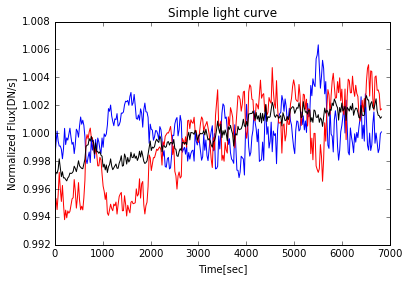

In [58]:
rl.light_curve(av_data['Time'], av_data['a1_res_flux'], style = 'b-')
rl.light_curve(av_data['Time'], av_data['b4_res_flux'], style = 'r-')
rl.light_curve(av_data['Time'], av_data['a1_b4_res_flux'], style = 'k-')

## 10/6

In [2]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

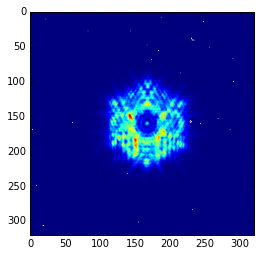

In [5]:
im = rl.test_image(hdu_filenames_a1[2])[0]
plt.imshow(im)

In [12]:
im

array([[ 0.34936523,  0.86694336,  0.49499512, ...,  0.20776367,
         0.30212402,  0.10131836],
       [ 0.30224609,  0.71557617,  0.69665527, ...,  0.26416016,
         0.60974121,  0.10009766],
       [ 0.38830566,  0.33959961,  0.56066895, ...,  0.59667969,
         0.09375   ,  0.14379883],
       ..., 
       [ 0.05187988,  0.16650391,  0.14245605, ...,  0.61230469,
         0.16918945,  0.26367188],
       [ 0.02404785,  0.31054688,  0.03918457, ...,  0.17797852,
         0.43017578,  0.19555664],
       [ 0.49963379,  0.31640625,  0.50439453, ..., -0.00512695,
         0.74597168,  0.19775391]], dtype=float32)

In [3]:
centers_a1 = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, hdu_filenames_a1)

In [4]:
hdu_filenames_b4 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-*_489_SE_*/*.slp.fits')

In [5]:
centers_b4 = rl.gen_center_g2d(162, 156, 5, 500, 2, 2, 0, hdu_filenames_b4)

In [70]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [74]:
flux_table = rl.time_series(centers_a1[1], centers_a1[2], hdu_filenames_a1, 80, 90, 100)

In [75]:
flux_table

raw_flux,bkg_flux,res_flux,time
float64,float64,float64,float64
3316973.81327,-7212.07715657,3324185.89043,0.0
3322041.36809,-5272.7622616,3327314.13036,22.38012
3353265.11638,23143.3441053,3330121.77228,44.76024
3322215.80189,-5493.3946049,3327709.19649,67.14036
3320907.62903,-5630.82300145,3326538.45203,89.52048
3320245.98531,-6315.37376703,3326561.35908,111.9006
3340858.07641,15088.1357841,3325769.94062,134.28072
3328634.58801,5115.01693739,3323519.57108,156.66084
3329627.74327,3648.9951082,3325978.74817,179.04096


In [65]:
data = rl.average_residual_flux(centers_a1[0], centers_b4[0], 80, 90, 100, hdu_filenames_a1, hdu_filenames_b4)

In [66]:
av_data = data[0]
source_ap_old = data[1]
bkg_ap_old = data[2]
av_data

a1_b4_raw_flux,a1_raw_flux,b4_raw_flux,a1_bkg_flux,b4_bkg_flux,a1_res_flux,b4_res_flux,a1_b4_res_flux,Time
float64,float64,float64,float64,float64,float64,float64,float64,float64
3812726.39914,3316973.81327,4308478.985,-2141.08540586,10378.0295868,3324185.89043,4273521.41165,3798853.65104,0.0
3824398.26387,3322041.36809,4326755.15965,-1565.35129641,15593.2220915,3327314.13036,4274230.62207,3800772.37621,22.38012
3821102.19507,3353265.11638,4288939.27376,6870.68028127,5374.15234549,3330121.77228,4270836.86586,3800479.31907,44.76024
3809899.98618,3322215.80189,4297584.17047,-1630.85152333,6566.88916635,3327709.19649,4275464.12275,3801586.65962,67.14036
3811881.88543,3320907.62903,4302856.14183,-1671.65057855,6097.26017167,3326538.45203,4282318.0023,3804428.22717,89.52048
3810881.64615,3320245.98531,4301517.30698,-1874.87658709,7229.59788348,3326561.35908,4277164.97726,3801863.16817,111.9006
3812834.52191,3340858.07641,4284810.96741,4479.29031092,3403.47557789,3325769.94062,4273346.62863,3799558.28462,134.28072
3816635.55756,3328634.58801,4304636.52711,1518.52065329,7823.76231118,3323519.57108,4278282.80143,3800901.18625,156.66084
3805119.11221,3329627.74327,4280610.48114,1083.29542275,2424.12372571,3325978.74817,4272445.01175,3799211.87996,179.04096


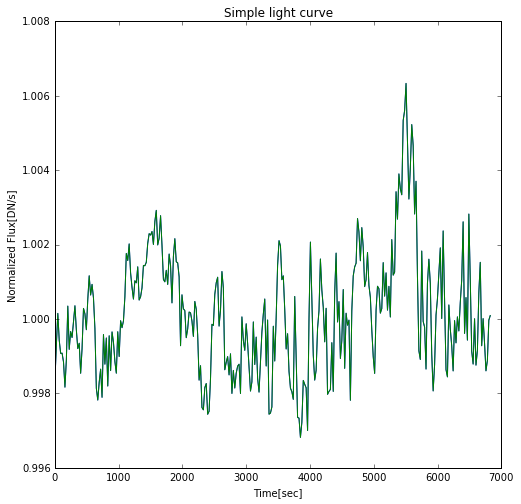

In [77]:
plt.figure(figsize=(8,8))
rl.light_curve(av_data['Time'], av_data['a1_res_flux'], style = 'b-')
rl.light_curve(av_data['Time'], flux_table['res_flux'], style = 'g-')

In [78]:
diff_res = Table()
diff_res['a1_res_old'] = av_data['a1_res_flux']
diff_res['a1_res_new'] = flux_table['res_flux']
diff_res['diff_reserence'] = [(a-b) for (a,b) in zip(av_data['a1_res_flux'], flux_table['res_flux'])]
diff_res

a1_res_old,a1_res_new,diff_reserence
float64,float64,float64
3324185.89043,3324185.89043,0.0
3327314.13036,3327314.13036,0.0
3330121.77228,3330121.77228,0.0
3327709.19649,3327709.19649,0.0
3326538.45203,3326538.45203,0.0
3326561.35908,3326561.35908,0.0
3325769.94062,3325769.94062,0.0
3323519.57108,3323519.57108,0.0
3325978.74817,3325978.74817,0.0


In [17]:
diff_raw = Table()
diff_raw['a1_raw_old'] = av_data['a1_raw_flux'] 
diff_raw['a1_raw_new'] = flux_table['raw_a1']
diff_raw['difference'] = [(a-b) for (a,b) in zip(av_data['a1_raw_flux'], flux_table['raw_a1'])]
diff_raw

a1_raw_old,a1_raw_new,difference
float64,float64,float64
3316973.81327,3316973.81327,0.0
3322041.36809,3322041.36809,0.0
3353265.11638,3353265.11638,0.0
3322215.80189,3322215.80189,0.0
3320907.62903,3320907.62903,0.0
3320245.98531,3320245.98531,0.0
3340858.07641,3340858.07641,0.0
3328634.58801,3328634.58801,0.0
3329627.74327,3329627.74327,0.0


In [23]:
source_ap_old.area(), bkg_ap_old.area()

(20106.192982974677, 5969.026041820607)